## In Class Assignment 1

1. Using the dataset of taxi cab rides, lets see how much progress we can make reverse-engineering the pricing structure into the form:

`total` = a_0 + a_1 * `distance` + a_2 * `tolls` + a_3 * `tip` + a_4 * `fare` + a_5 * `passengers`

so that one can predict the cost of future rides.

2. Are you sure that this formula is the same that the taxi uses?  Explain why or why not.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


df_taxi = sns.load_dataset('taxis')
df_taxi.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [2]:
def disp_regress(df, x_feat_list, y_feat, verbose=True):
    """ linear regression, displays model w/ coef
    
    Args:
        df (pd.DataFrame): dataframe
        x_feat_list (list): list of all features in model
        y_feat (list): target feature
        verbose (bool): toggles command line output
        
    Returns:
        reg (LinearRegression): model fit to data
    """
    # initialize regression object
    reg = LinearRegression()

    # get target variable
    x = df.loc[:, x_feat_list].values
    y = df.loc[:, y_feat].values

    # fit regression
    reg.fit(x, y)

    # compute / store r2
    y_pred = reg.predict(x)
    
    if verbose:
        # print model  
        model_str = y_feat + f' = {reg.intercept_:.2f}'
        for feat, coef in zip(x_feat_list, reg.coef_):
            model_str += f' + {coef:.2f} {feat}'
        print(model_str)

        # compute / print r2
        r2 = r2_score(y_true=y, y_pred=y_pred)
        print(f'r2 = {r2:.3}')
    
    return reg

In [3]:
y_feat = 'total'
x_feat_list = ['distance', 'tolls', 'tip', 'fare', 'passengers']

disp_regress(df_taxi, x_feat_list, y_feat)

total = 3.10 + -0.01 distance + 1.02 tolls + 1.17 tip + 0.97 fare + 0.06 passengers
r2 = 0.994


LinearRegression()

In [4]:
# No, this is not the same formula that taxis would use. 

# ICA 2

For the `first_month_covid_us.csv` dataset
1. scatter `day` & `total_cases`
    - between February 22 and March 22, 2020
1. fit an exponential model to the data
1. compute / print an r2 value of the exponential model
1. (extra) print a string which shows the model itself


$$ \hat{y} = \alpha_0 e^{a_1 x} $$

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


df_covid = pd.read_csv('first_month_covid_us.csv').set_index('date')

df_covid.head()

,day,total_cases
date,,
2020-02-22,0,7.0
2020-02-23,1,8.0
2020-02-24,2,9.0
2020-02-25,3,10.0
2020-02-26,4,12.0


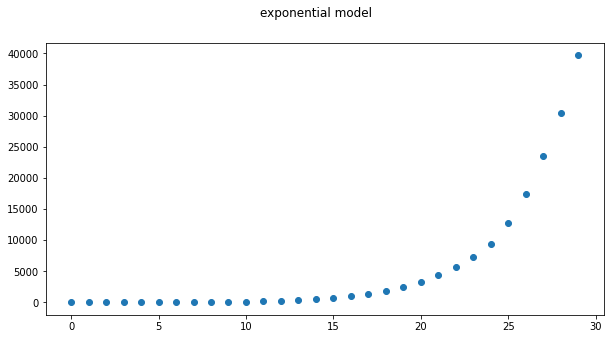

In [6]:
# set x and y
x = df_covid.loc[:, 'day'].values
y = df_covid.loc[:, 'total_cases'].values

# reshape 
x = x.reshape(-1, 1)

# set linear regression
reg = LinearRegression()

# plot exp model
reg.fit(x, np.log(y))           
y_hat = np.exp(reg.predict(x)) 

# compute r2
r2_exp = r2_score(y_true=y, y_pred=y_hat)

# extract coefficients and print meaning
a_0_pred = reg.intercept_
a_1_pred = reg.coef_[0]
alpha0_pred = np.exp(a_0_pred)
        
# plot
plt.suptitle('exponential model')
plt.gcf().set_size_inches(10, 5)
plt.scatter(x, y, label='observations')

# ICA 3

1. Generate one dummy polynomial dataset
    - getting 101 evenly spaced x samples from -2 to 2
        - np.linspace()
    - generating a noisy y by projecting the x samples via 
        - `coef = np.array([0, 1, -1, 1])`
        - use the functions given in this polynomial section
        - be sure to add noise so your observations aren't 'perfect':
            - `y = y + np.random.standard_normal(y.size)`
1. Write a function `fit_plot_poly(x, y, degree)`:
    - projects raw x in to polynomial features of some `degree`
    - fits a polynomial regression model
    - plots the result
    - titles the plot with the predicted model & r^2 value
1. Loop over your `fit_plot_poly()` function to fit polynomials of degree 0, 1, 2, 3, ... 10 and respond to the questions below:
    - what do you notice about r^2 as the degree of the polynomial increases
    - is the polynomial with the lowest r^2 the best model (hint: no).  Why not?
        - (extra) for a more compelling example, try reducing the number of observations to 11 ...
            - its tough to see the behavior of the polynomial between the 11 observatoins (should look piecewise linear).  try making and predicting a finer grained x in your `fit_plot_poly()` which allows you to observe the polynomial's behavior
   

In [7]:
def poly(x, coef):
    """ computes polynomials in x
    
    to represent the polynomial:
    
    a_0 x^0 + a_1 x^1 + a_2 x^2 + a_3 x^3 + ...
    
    coef = [a_0, a_1, a_2, a_3, ...]
    
    Args:
        x (np.array): input values
        coef (np.array): coefficients of polynomial
    """
    # initialize y as array of zeros
    y = np.zeros_like(x)
    
    # adds each monomial one at a time
    for deg, a in enumerate(coef):
        y += a * x ** deg
        
    return y 

In [8]:
from sklearn.preprocessing import PolynomialFeatures

def fit_plot_poly(x, y, degree):
    
    poly_project = PolynomialFeatures(degree=degree)
    x_poly = poly_project.fit_transform(x)
    
    reg = LinearRegression(fit_intercept=False)
    reg.fit(x_poly, y)
    
    x_fine = np.linspace(x.min(), x.max(), 101).reshape(-1, 1)
    x_fine_poly = poly_project.fit_transform(x_fine)
    y_pred_fine = reg.predict(x_fine_poly)
    
    y_pred = reg.predict(x_poly)
    r2 = r2_score(y_true=y, y_pred=y_pred)
    
    plt.plot(x_fine, y_pred_fine, label=f'model r2={r2:.3f}', color='k', linewidth=2)
    plt.scatter(x, y, label='observed', color='r')
    plt.legend()

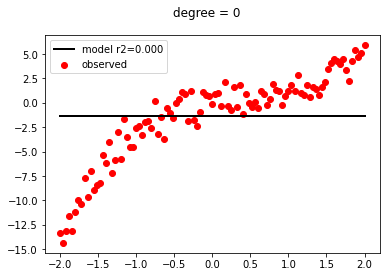

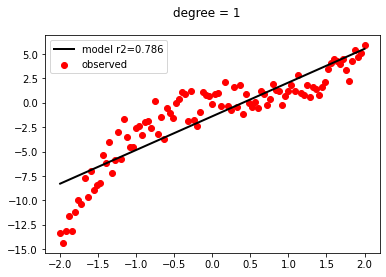

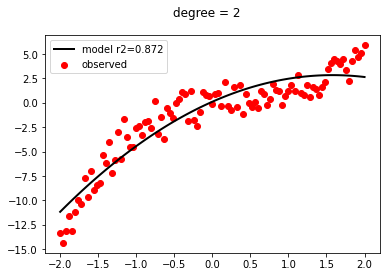

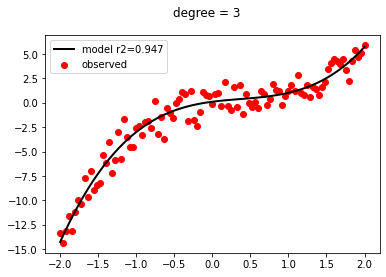

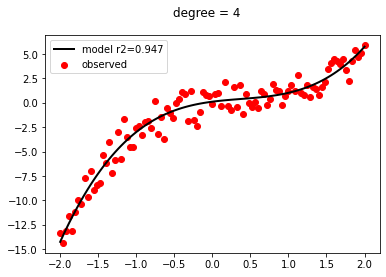

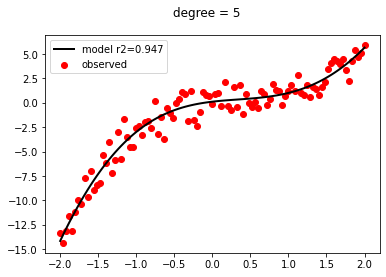

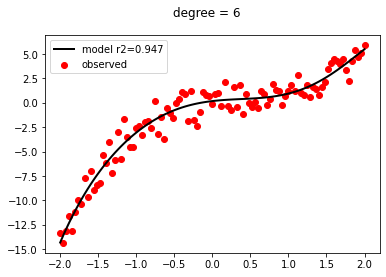

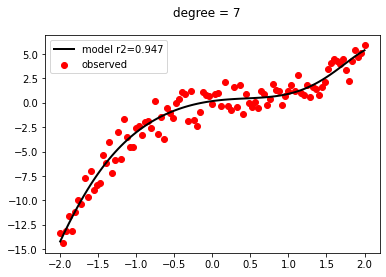

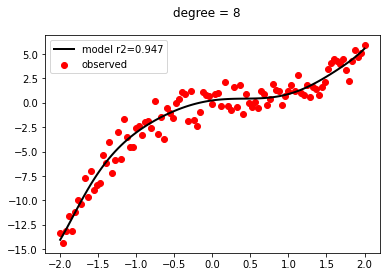

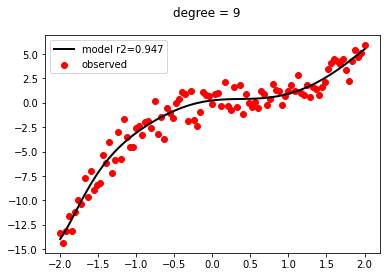

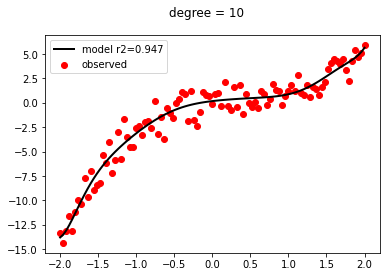

In [9]:
import random 
coef = np.array([0, 1, -1, 1])
x = np.linspace(-2, 2, 101)

y = poly(x, coef=coef)

y = y + np.random.standard_normal(x.size)

x = x.reshape(-1, 1)

for degree in range(11):
    plt.figure()
    
    fit_plot_poly(x, y, degree)
    plt.suptitle(f'degree = {degree}')